APM 598 Homework 1 - 6th February 2023

Siddharth Jain 1226137070

Ketan Choudhary 1226082301

Pranav Chougule 1225934595

In [143]:
# Required Imports
import numpy as np
import matplotlib.pyplot as plt

In [144]:
# Dataset
filepath = 'data_HW1_ex1.csv'
data = np.loadtxt(filepath, delimiter=',')

In [145]:
# Splitting the dataset
x = data[:,0]
y = data[:,1]
k = 12 # given

In [146]:
# Loss function
def loss(degree, x, y):
    return np.sum((np.polyval(np.polyfit(x, y, degree), x) - y)**2)

In [147]:
def q1a():
    losses = []
    for degree in range(0, k):
        losses.append(loss(degree, x, y))
    plt.figure('Q 1a - Plot for Loss as a function of k')
    plt.plot(range(0, k), losses, 'r-')
    plt.xlabel('Degree')
    plt.ylabel('Loss')
    plt.show()

In [148]:
# Taking the first 80 data points for training and remaining 20 for test
x_train = data[0 : int(len(data) * 0.8), 0]
y_train = data[0 : int(len(data) * 0.8), 1]
x_test = data[int(len(data) * 0.8):, 0]
y_test = data[int(len(data) * 0.8):, 1]

In [149]:
def q1bc():
    error_train = []
    error_test = []

    for degree in range(0, k+1):
        error_train.append(loss(degree, x_train, y_train))
        poly_fit = np.poly1d(np.polyfit(x_train, y_train, degree))
        prediction = poly_fit(x_test)
        error_test.append(np.sum((prediction-y_test)**2))
    print('Degree   Train Loss   Test Loss')
    for degree, (er_train, er_test) in enumerate(zip(error_train, error_test)):
        print('%-9i%-13.4f%.4f'%(degree, er_train, er_test))
    k_star = error_test.index(min(error_test))
    print('\nOrder k* = {} since it has the least mean square error\n'.format(k_star))
    coeeficient = np.polyfit(x, y, k_star)
    print('\nCoefficients for k*(',k_star,'): ', coeeficient)

    fig = plt.figure('Q 1b - Test and Train Losses at Polynomial Degree k')
    diag1 = fig.add_subplot(1, 2, 1)
    training_line, = diag1.plot(range(0, k+1), error_train, c='k')
    test_line, = diag1.plot(range(0, k+1), error_test, c='r')
    diag1.legend([training_line, test_line], ["Train Loss", "Test Loss"])
    diag1.set(xlabel="Degree", ylabel="Loss")
    
    diag2 = fig.add_subplot(1, 2, 2)
    prediction = np.poly1d(np.polyfit(x, y, k_star))
    diag2.plot(x, y, 'ko')
    sort_x = sorted(x)
    fit_p, = diag2.plot(sort_x, prediction(sort_x), 'r-')
    diag2.set(xlabel = "x", ylabel = "y")
    diag2.legend([fit_p], ["K* = {}".format(k_star)])
    plt.show()


Q 1a



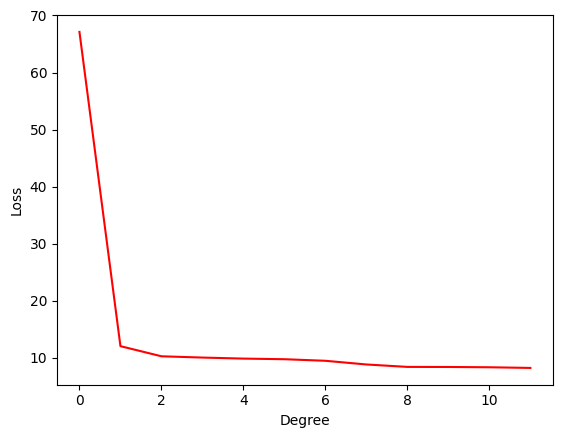


Q 1b 1c

Degree   Train Loss   Test Loss
0        37.8110      36.0556
1        9.9070       2.3370
2        7.1658       5.8764
3        7.0453       8.5448
4        6.8797       15.9698
5        6.8533       21.7465
6        6.1257       22.6904
7        5.8454       26.9265
8        5.5408       240.0763
9        5.4494       3400.0992
10       5.3134       87689.9930
11       3.6145       18336610.0806
12       3.5227       57634507.3961

Order k* = 1 since it has the least mean square error


Coefficients for k*( 1 ):  [ 1.50632587 -1.35865816]


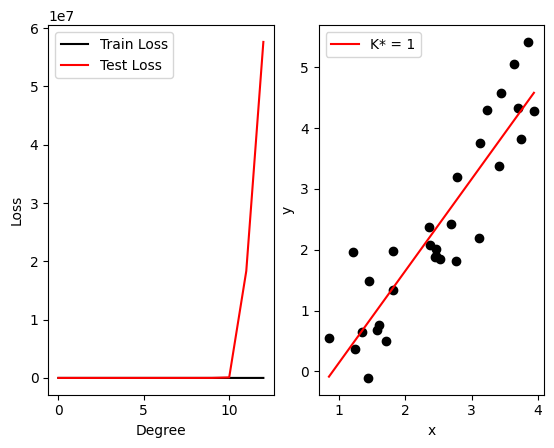

In [150]:
print('\nQ 1a\n')
q1a()
print('\nQ 1b 1c\n')
q1bc()

In [151]:
print('\nQ 2b 2c\n')
a0 = 1.8
b0 = 1.4
learning_rate = 0.05
gamma = 0.9


Q 2b 2c



In [152]:
def gradient_descent(x_train, y_train, a0, b0, learning_rate, numerically_optimal_ab):
    iteration = 1
    n = len(x_train)
    old_theta = np.array([a0, b0])
    a = old_theta[0]
    b = old_theta[1]
    gradient_a = 1 / n * (np.sum(-2 * (y_train - a - (b * x_train))))
    gradient_b = 1 / n * (np.sum(-2 * ((x_train * y_train) - (a * x_train) - (b * (x_train**2)))))
    gradient_ab = np.array([gradient_a, gradient_b])
    new_theta = old_theta - (learning_rate * (gradient_ab))
    while((new_theta - old_theta).all() != 0):
        iteration += 1
        old_theta = new_theta
        a = old_theta[0]
        b = old_theta[1]
        gradient_a = 1 / n * (np.sum(-2 * (y_train - a - (b * x_train))))
        gradient_b = 1 / n * (np.sum(-2 * ((x_train*y_train) - (a * x_train) - (b * (x_train**2)))))
        gradient_ab = np.array([gradient_a, gradient_b])
        new_theta = old_theta - (learning_rate * gradient_ab)
    return [iteration, new_theta]
print('Method             Iterations    a_star    b_star')
iterations1, new_theta1 = gradient_descent(x_train, y_train, a0, b0, learning_rate, optimal_ab)
print('Gradient Descent   %-14i%-10.4f%.4f'%(iterations1, new_theta1[0], new_theta1[1]))


Method             Iterations    a_star    b_star
Gradient Descent   3459          -1.2421   1.4386


In [153]:
def momentum(x_train, y_train, gamma, a0, b0, learning_rate):
    iteration = 1
    n = len(x_train)
    old_theta = np.array([a0, b0])
    vn = np.array([0.0, 0.0])
    a, b = old_theta[0], old_theta[1]
    gradient_a = 1 / n * (np.sum(-2 * (y_train - a - (b * x_train))))
    gradient_b = 1 / n * (np.sum(-2 * ((x_train * y_train) - (a * x_train) - (b * (x_train**2)))))
    gradient_ab = np.array([gradient_a,gradient_b])
    new_vn = (gamma * vn) + (learning_rate * gradient_ab)
    new_theta = old_theta - new_vn
    while((new_theta - old_theta).all() != 0):
        iteration += 1
        old_theta = new_theta
        vn = new_vn
        a = old_theta[0]
        b = old_theta[1]
        gradient_a = 1 / n * (np.sum(-2 * (y_train - a - (b * x_train))))
        gradient_b = 1 / n * (np.sum(-2 * ((x_train * y_train) - (a * x_train) - (b * (x_train**2)))))
        gradient_ab = np.array([gradient_a, gradient_b])
        new_vn = (gamma * vn) + (learning_rate * gradient_ab)
        new_theta = old_theta - new_vn
    return [iteration, new_theta]
print('Method             Iterations    a_star    b_star')
iterations2, new_theta_momentum2 = momentum(x_train, y_train, gamma, a0, b0, learning_rate)
print('Momentum           %-14i%-10.4f%.4f'%(iterations2, new_theta_momentum2[0], new_theta_momentum2[1]))


Method             Iterations    a_star    b_star
Momentum           593           -1.2421   1.4386


In [154]:
def nesterov(x_train, y_train, gamma, a0, b0, learning_rate):
    iteration = 1
    n = len(x_train)
    old_theta = np.array([a0, b0])
    a, b = old_theta[0], old_theta[1]
    vn = np.array([0.0, 0.0])
    gradient_a = 1 / n * (np.sum(-2 * (y_train - a -(gamma * vn[0]) - ((b - (gamma * vn[1])) * x_train))))
    gradient_b = 1 / n * (np.sum(-2 * ((x_train * y_train) - ((a - (gamma * vn[0])) * x_train) - ((b - (gamma * vn[1])) * (x_train**2)))))
    gradient_ab = np.array([gradient_a, gradient_b])
    new_vn = (gamma * vn) + (learning_rate * gradient_ab)
    new_theta = old_theta - new_vn
    while((new_theta - old_theta).all() != 0):
        iteration += 1
        old_theta = new_theta
        vn = new_vn
        a = old_theta[0]
        b = old_theta[1]
        gradient_a = 1 / n * (np.sum(-2 * (y_train - (a -(gamma * vn[0])) - ((b - (gamma * vn[1])) * x_train))))
        gradient_b = 1 / n * (np.sum(-2 * ((x_train * y_train) - ((a - (gamma * vn[0])) * x_train) - ((b - (gamma * vn[1])) * (x_train**2)))))
        gradient_ab = np.array([gradient_a, gradient_b])
        new_vn = (gamma * vn) + (learning_rate * gradient_ab)
        new_theta = old_theta - new_vn
    return [iteration, new_theta]
print('Method             Iterations    a_star    b_star')
iterations3, new_theta_nesterov3 = nesterov(x_train, y_train, gamma, a0, b0, learning_rate)
print('Nesterov           %-14i%-10.4f%.4f'%(iterations3, new_theta_nesterov3[0], new_theta_nesterov3[1]))

Method             Iterations    a_star    b_star
Nesterov           553           -1.2421   1.4386


In [155]:
print("\nQ 2a\n")
x_train = data[0 : int(len(data)), 0]
y_train = data[0 : int(len(data)), 1]
n = len(x_train)
b_star = (np.sum(x_train * y_train) - (1 / n * (np.sum(x_train) * np.sum(y_train)))) / (np.sum((x_train**2)) - (1 / n * (np.sum(x_train)**2)))
a_star = 1 / n * (np.sum(y_train) - (b_star * np.sum(x_train)))
optimal_ab = np.array([a_star, b_star])
print('Deducing numerically:')
print('a_star: {}\nb_star:  {}\n'.format(optimal_ab[0], optimal_ab[1]))


Q 2a

Deducing numerically:
a_star: -1.358658160753337
b_star:  1.5063258659470231



<img src='derivation1.jpeg'>
<img src='derivation2.jpeg'>

In [156]:
import torch
from torch import nn
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [157]:
cfg = dict()
cfg['numEpochs'] = 40
cfg['learning_rate'] = 0.0001
cfg['batchSize'] = 4

In [158]:
MNIST_training_set_tensor = datasets.FashionMNIST('data', train = True, download = True, transform = transforms.ToTensor())
MNIST_test_set_tensor = datasets.FashionMNIST('data', train = False, download = True, transform = transforms.ToTensor())
myLoader_train = DataLoader(MNIST_training_set_tensor, shuffle = True, batch_size = cfg['batchSize'])
myLoader_test = DataLoader(MNIST_test_set_tensor, shuffle = False, batch_size = cfg['batchSize'])

In [159]:
#myModel
myModel = nn.Linear(784, 10)
optimizer = torch.optim.Adam(myModel.parameters(), lr = cfg['learning_rate'])
myLoss = nn.CrossEntropyLoss()
#print(myModel.state_dict())
final_loss=[]

In [160]:
print("Q 3a\n")
for epoch in range(cfg['numEpochs']):
    running_loss = 0
    minibatch = 0
    for x_mini, y_mini in myLoader_train:
        optimizer.zero_grad()
        N, _, q, r = x_mini.size()
        score = myModel(x_mini.view(N,q*r))
        loss = myLoss(score,y_mini)
        loss.backward()
        optimizer.step()
        running_loss += loss.detach().numpy()
        minibatch += 1
    average_loss = running_loss/minibatch
    final_loss.append(average_loss)
    print("E:{} Average Loss: {}".format(epoch+1, average_loss))

Q 3a

E:1 Average Loss: 0.7139170745755236
E:2 Average Loss: 0.5159314553940514
E:3 Average Loss: 0.4774667513840599
E:4 Average Loss: 0.45732658601621323
E:5 Average Loss: 0.44381647969970167
E:6 Average Loss: 0.43416462090292673
E:7 Average Loss: 0.42735239889814014
E:8 Average Loss: 0.42137811187998936
E:9 Average Loss: 0.4171578940883822
E:10 Average Loss: 0.41254373762860974
E:11 Average Loss: 0.40950242257257147
E:12 Average Loss: 0.40614574913239143
E:13 Average Loss: 0.4036863504893709
E:14 Average Loss: 0.4013412846794924
E:15 Average Loss: 0.3994920930537085
E:16 Average Loss: 0.3975230125461181
E:17 Average Loss: 0.3955777901786894
E:18 Average Loss: 0.3936058884898977
E:19 Average Loss: 0.3920777539262936
E:20 Average Loss: 0.3908284713284559
E:21 Average Loss: 0.38955447497993884
E:22 Average Loss: 0.3881976457363664
E:23 Average Loss: 0.38711647709034924
E:24 Average Loss: 0.3861849814362533
E:25 Average Loss: 0.38527873083345865
E:26 Average Loss: 0.38439105056159123
E:2


Q 3b



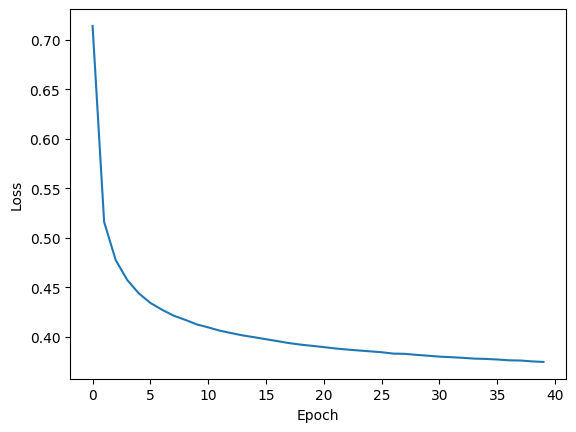

<Figure size 640x480 with 0 Axes>

In [161]:
print('\nQ 3b\n')  
weights = myModel.state_dict()['weight'] 
plt.plot([i for i in range(cfg['numEpochs']) ],final_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.clf()


Q 3c



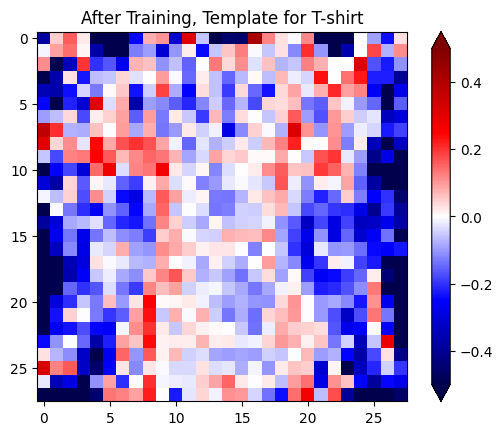

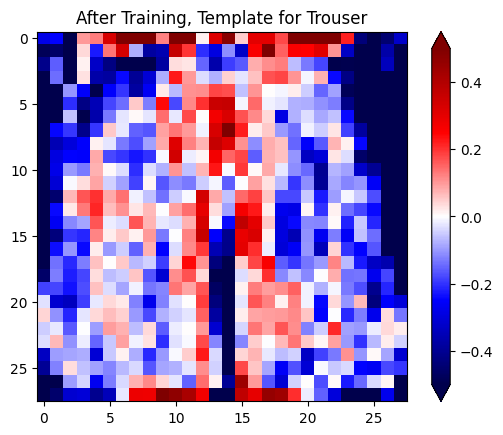

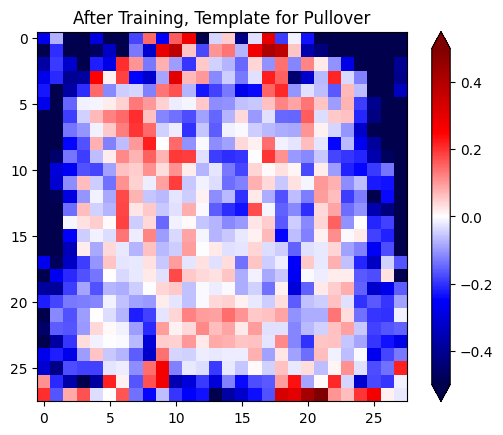

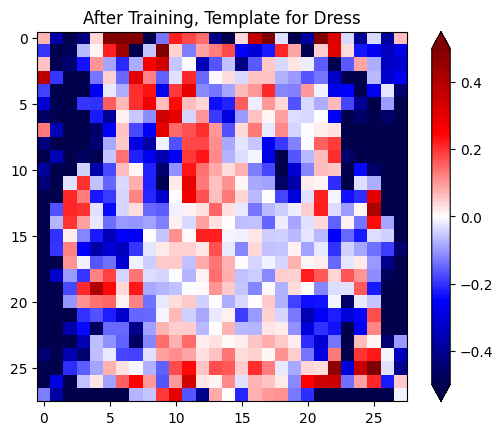

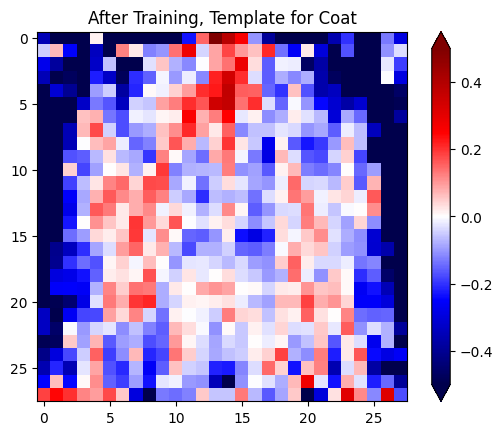

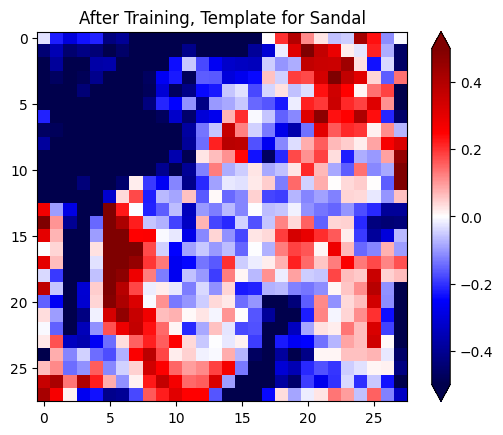

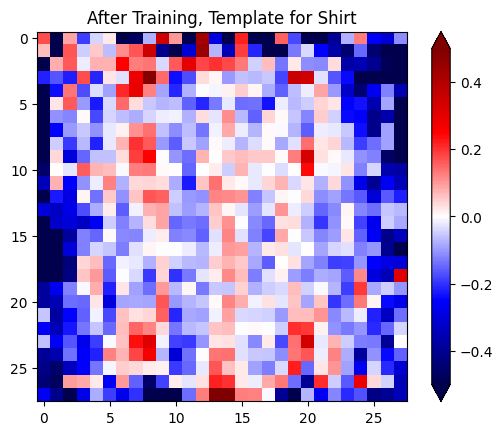

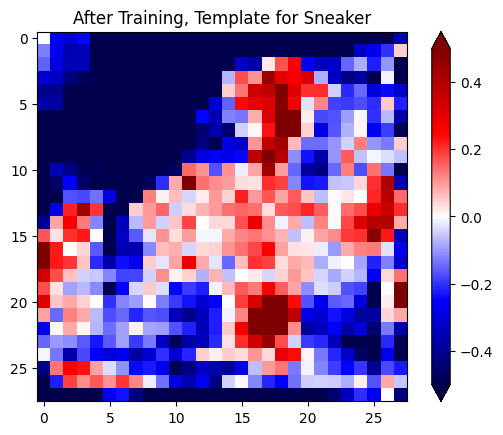

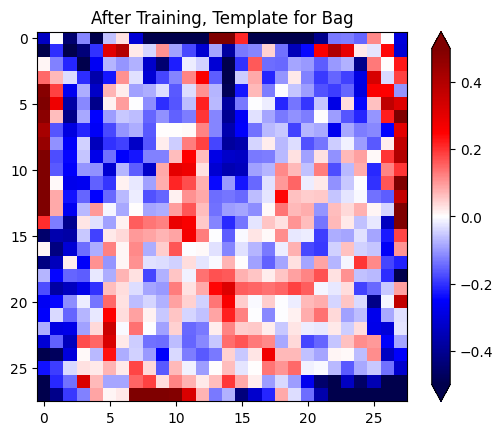

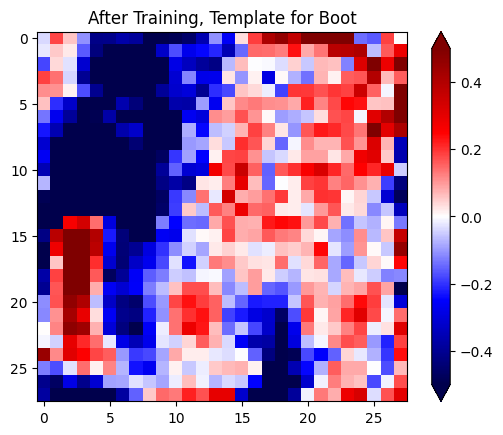

In [162]:
print("\nQ 3c\n")
label_fashion = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
for i in range(10):
    plt.clf()
    plt.imshow(weights[i].view(28,28), vmin = -0.5, vmax = 0.5, cmap = 'seismic')
    plt.title('After Training, Template for {}'.format(label_fashion[i]))
    plt.colorbar(extend='both')
    plt.show()